# **Lab 1**

> First and Last Name: Harsanjam Saini




## Introduction

---

In project, we'll delve into the Gradient Descent algorithm for tackling a linear regression problem. To start, we'll visualize the student marks dataset provided in a `.csv` file to better grasp its characteristics.

In [655]:
import pandas as pd
import matplotlib.pyplot as plt

In [656]:
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv"
df = pd.read_csv(url)

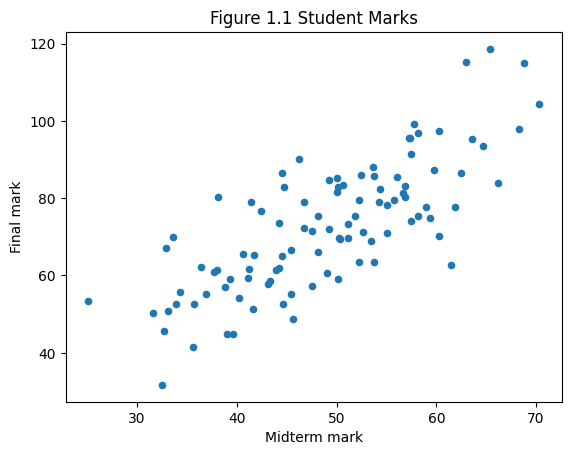

In [657]:
df.plot(x='Midterm mark', y='Final mark', kind='scatter')
plt.title('Figure 1.1 Student Marks')
plt.show()

The graph illustrates a positive relationship between the midterm and final marks of the students. This is evident from the upward trend displayed by the data points on the graph.

## Implementation

---

We'll employ the standard linear equation `y = mx + b`, where `x` represents the midterm mark and `y` denotes the final mark. Our objective is to determine the optimal values for the slope `m` and the y-intercept `b`. To achieve this, we'll define three functions in Python.

* Standardization

* Error (cost function)

* Gradient Partial Derivatives


In [658]:
import numpy as np

In [659]:
def standardizationFunction(x, MU, Sigma):
  answer = (x - MU) / Sigma
  return answer

In [660]:
def errorCostFunction(x, y, m, b):
  N = len(x)
  answer = (1/N) * np.sum((y - (m * x + b)) ** 2)
  return answer

In [661]:
def gradientFunction(x, y, m, b):
  N = len(x)
  d_M = -(2/N) * np.sum(x * (y - (m * x + b)))
  d_B = -(2/N) * np.sum(y - (m * x + b))
  return d_M, d_B

During the parameter update step in the gradient descent algorithm, we subtract from the current values of `m` and  `b` to move towards minimizing the error or cost function.

* A negative slope suggests that the minimum lies to the right of the current point.
* Conversely, a positive slope indicates that the minimum lies to the left of the current point.

By incorporating a negative sign in the update equation, we effectively guide the new parameter values towards the intended minimum point.


In [662]:
def updateParameter(m, b, d_m, d_b, learningRate):
  new_m = m - (learningRate * d_m)
  new_b = b - (learningRate * d_b)
  return new_m, new_b

We begin by initializing `m = -0.5`, `b = 0`, and `α = 0.0001`.


In [663]:
m, b, learnRate = -0.5, 0, 0.0001

x = df['Midterm mark'].values
y = df['Final mark'].values

The following regression line is shown alongside the data set.

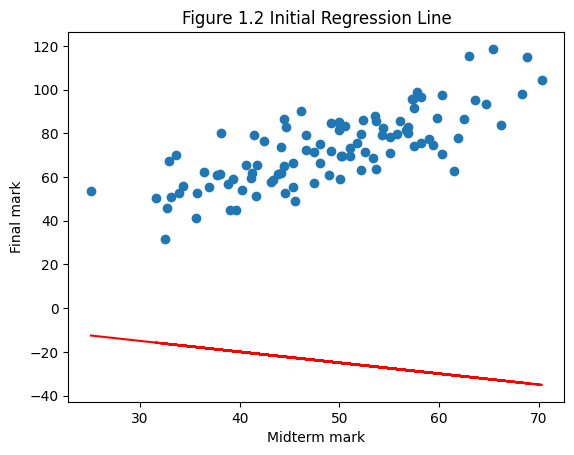

In [664]:
plt.scatter(x, y)
plt.plot(x, m * x + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 1.2 Initial Regression Line')
plt.show()

A larger difference between the expected and actual numbers is indicated by a higher error value. This implies that the overall trend of the data is not well captured by the first regression line.

In [665]:
error = errorCostFunction(x, y, m, b)
print(error)

9873.218075


### Running 100 Iterations

---

After `100` iterations, we may lower the error and raise the accuracy of the regression model by using `gradientFunction` and `updateParameter`.


In [666]:
num_iterations = 100
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(x, y, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(x, y, m, b)
  errors.append(error)

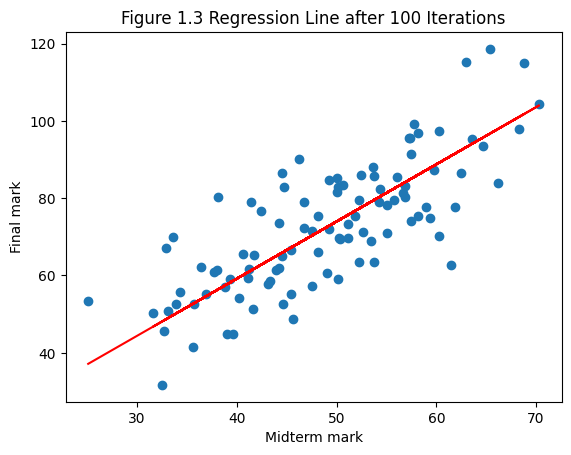

In [667]:
plt.scatter(x, y)
plt.plot(x, m * x + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 1.3 Regression Line after 100 Iterations')
plt.show()

In [668]:
print(errors)

[2568.538719289938, 730.6482467173154, 268.2266436753636, 151.87924461179387, 122.60568437713027, 115.24029678679945, 113.3871047662959, 112.92080614397781, 112.80345618925541, 112.77390330184978, 112.76644055506391, 112.76453578822431, 112.76402943474835, 112.7638749288243, 112.76380894974875, 112.76376524483878, 112.7637271446191, 112.76369045497397, 112.76365412064496, 112.76361787612423, 112.76358165460879, 112.76354543929074, 112.76350922594104, 112.7634730134957, 112.76343680168702, 112.7634005904476, 112.76336437976052, 112.76332816962149, 112.76329196002942, 112.76325575098402, 112.76321954248526, 112.76318333453307, 112.76314712712741, 112.76311092026842, 112.7630747139559, 112.76303850818996, 112.76300230297056, 112.76296609829771, 112.76292989417136, 112.76289369059153, 112.7628574875582, 112.76282128507137, 112.762785083131, 112.76274888173717, 112.76271268088982, 112.76267648058888, 112.7626402808344, 112.76260408162638, 112.76256788296483, 112.76253168484973, 112.76249548

In [669]:
print('slope:', m)
print('intercept:', b)

slope: 1.4785727560143909
intercept: 0.04490536397288713


As you can see, the modified regression line fits the dataset better than Figure 1.2 since it is more in line with the data points. When the `errors` are plotted at every iteration, a decreasing exponential trend in the errors is visible. A better match between the regression line and the data is produced by the optimization algorithm's convergence approaching a local minimum, as indicated by the decline in errors.


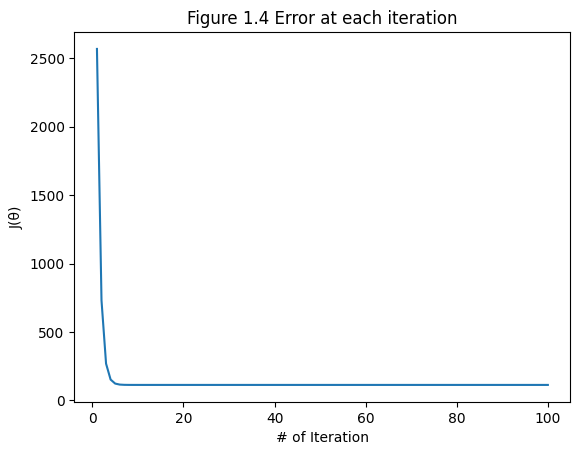

In [670]:
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('# of Iteration')
plt.ylabel('J(\u03B8)')
plt.title('Figure 1.4 Error at each iteration')
plt.show()

### Running 2000 Iterations

---

We go through all of the similar processes again, this time for `2000` repetitions.


In [671]:
num_iterations = 2000
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(x, y, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(x, y, m, b)
  errors.append(error)

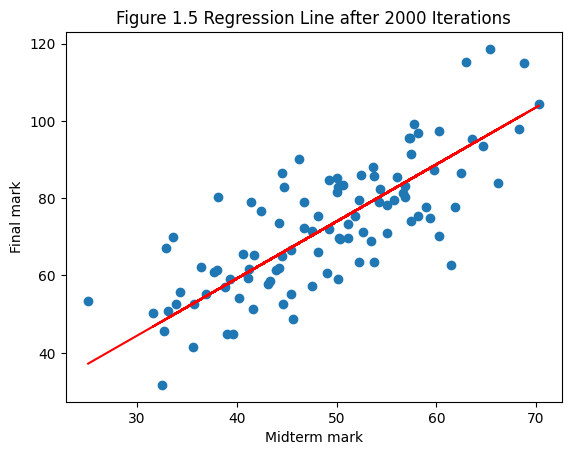

In [672]:
plt.scatter(x, y)
plt.plot(x, m * x + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 1.5 Regression Line after 2000 Iterations')
plt.show()

In [673]:
print(errors)

[112.76068630535435, 112.76065013564238, 112.76061396647638, 112.76057779785631, 112.76054162978231, 112.76050546225424, 112.76046929527213, 112.76043312883598, 112.76039696294576, 112.76036079760149, 112.76032463280315, 112.76028846855077, 112.76025230484426, 112.76021614168366, 112.76017997906897, 112.76014381700017, 112.76010765547719, 112.76007149450015, 112.76003533406895, 112.75999917418362, 112.75996301484413, 112.75992685605048, 112.75989069780266, 112.75985454010065, 112.75981838294447, 112.75978222633412, 112.75974607026954, 112.75970991475073, 112.75967375977771, 112.75963760535048, 112.75960145146902, 112.7595652981333, 112.7595291453433, 112.7594929930991, 112.75945684140059, 112.75942069024782, 112.75938453964076, 112.75934838957939, 112.75931224006378, 112.75927609109382, 112.75923994266954, 112.75920379479098, 112.75916764745801, 112.7591315006707, 112.7590953544291, 112.75905920873312, 112.75902306358277, 112.75898691897805, 112.75895077491894, 112.7589146314054, 112.7

In [674]:
print('slope:', m)
print('intercept:', b)

slope: 1.4762268473741809
intercept: 0.16426309885937293


When Figures 1.3 and 1.6 are compared, there is not much of variation amongst them, suggesting that the algorithm has either converged or is about there. Therefore, it's possible that no additional iterations will result in appreciable gains in the model's functionality.

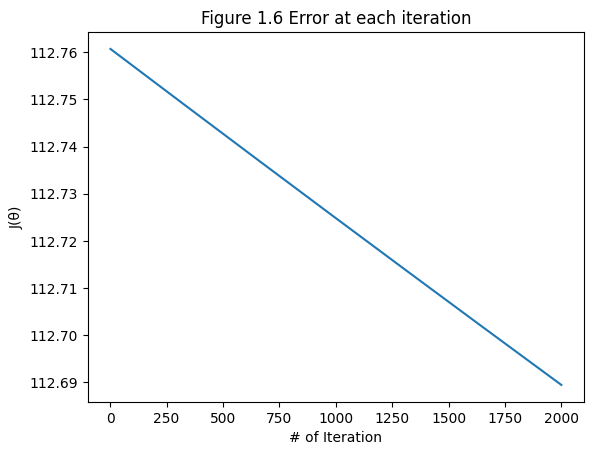

In [675]:
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('# of Iteration')
plt.ylabel('J(\u03B8)')
plt.title('Figure 1.6 Error at each iteration')
plt.show()

### Verifying Results

---

To verify the results, we will use an API in Python.

In [676]:
from sklearn.linear_model import LinearRegression

In [677]:
xFit = df['Midterm mark'].values.reshape((-1, 1))
yFit = df['Final mark'].values
model = LinearRegression().fit(xFit, yFit)

In [678]:
print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope: [1.32199232]
intercept: 8.01157813964086


To compare the difference between the expected and obtained regression line, we can graph the two.

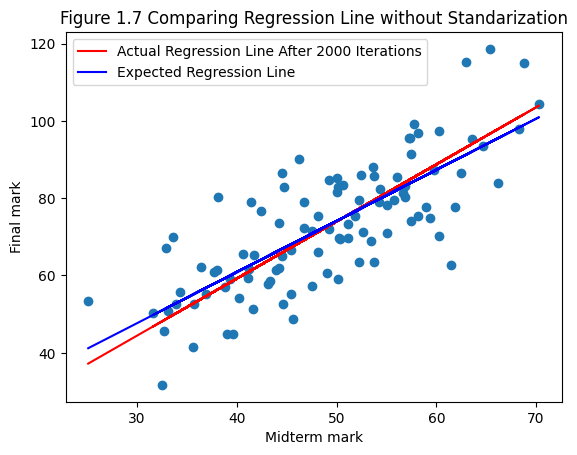

In [679]:
plt.scatter(x, y)
plt.plot(x, m * x + b, color='red', label='Actual Regression Line After 2000 Iterations')
plt.plot(x, model.coef_ * x + model.intercept_, color='blue', label='Expected Regression Line')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 1.7 Comparing Regression Line without Standarization')
plt.legend()
plt.show()

The two regression lines are rather near to each other, as you can see. More repetitions will eventually bring us closer to the same y-intercept and slope. As of right now, its representation of the data set is adequate.

## Standarization (`α` = 0.0001)

---
Re-implementing the prior functionality through the use of standardization. I'm going to re-initialize `m`, `b`, and `α`.


In [680]:
m, b, learnRate = -0.5, 0, 0.0001

x = df['Midterm mark'].values
y = df['Final mark'].values

In [681]:
xMu = np.mean(x)
xSigma = np.std(x)
xStand = standardizationFunction(x, xMu, xSigma).reshape(-1, 1)

yMu = np.mean(y)
ySigma = np.std(y)
yStand = standardizationFunction(y, yMu, ySigma).reshape(-1, 1)

Like before, let's plot the initial regression line.

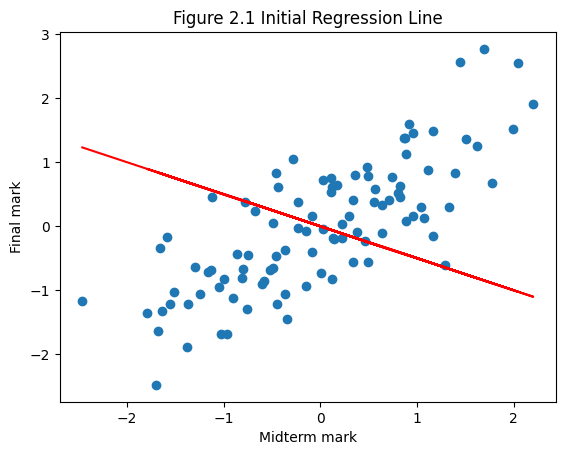

In [682]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 2.1 Initial Regression Line')
plt.show()

The large error number indicates that the initial regression line is, as predicted, significantly outside of the data set.

In [683]:
error = errorCostFunction(x, y, m, b)
print(error)

9873.218075


### Running 100 Iterations

---

Like before, we will run `100` iterations.

In [684]:
num_iterations = 100
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(xStand, yStand, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(xStand, yStand, m, b)
  errors.append(error)

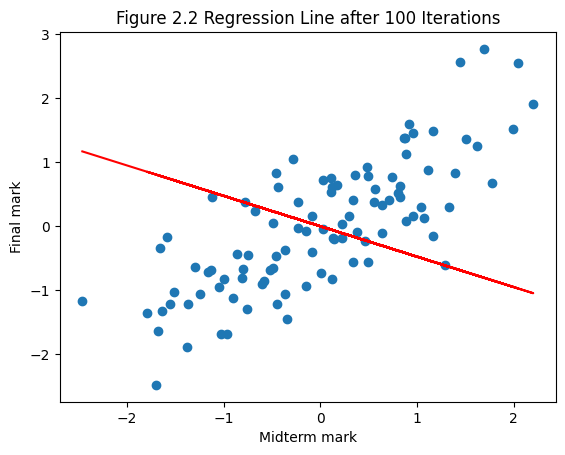

In [685]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 2.2 Regression Line after 100 Iterations')
plt.show()

In [686]:
print(error)

1.9598823170828028


In [687]:
print('slope:', m)
print('intercept:', b)

slope: -0.4747809463889036
intercept: -2.3439028495886304e-18


Then, below is the plot of the error at each iteration.

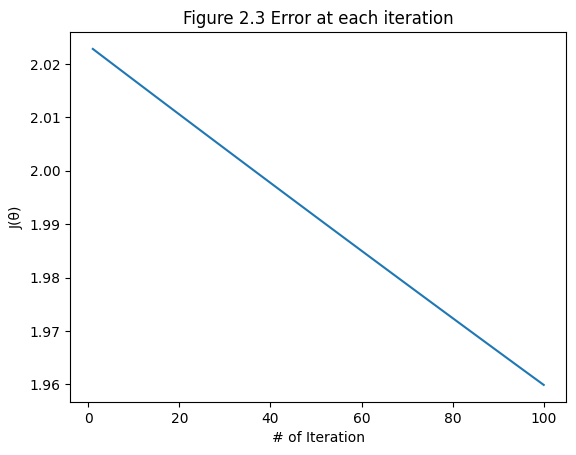

In [688]:
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('# of Iteration')
plt.ylabel('J(\u03B8)')
plt.title('Figure 2.3 Error at each iteration')
plt.show()

### Running 2000 Iterations

---

Then, again but now with `2000` iterations.

In [689]:
num_iterations = 2000
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(xStand, yStand, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(xStand, yStand, m, b)
  errors.append(error)

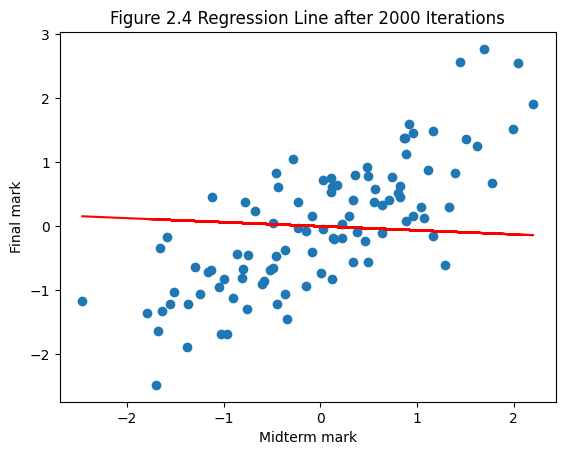

In [690]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 2.4 Regression Line after 2000 Iterations')
plt.show()

In [691]:
print(error)

1.1017978113923566


In [692]:
print('slope:', m)
print('intercept:', b)

slope: -0.06322147395894402
intercept: -1.7888801551180243e-17


Lastly, the plot of the error at each iteration.

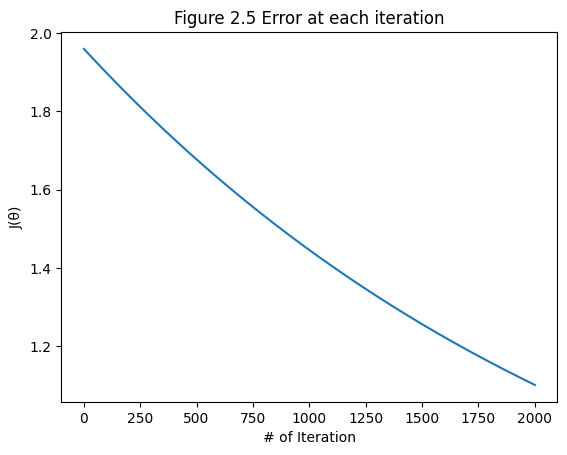

In [693]:
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('# of Iteration')
plt.ylabel('J(\u03B8)')
plt.title('Figure 2.5 Error at each iteration')
plt.show()

### Verifying Results

---

The regression line that was generated through standarization is going to be verified using the standarized dataset.

In [694]:
model = LinearRegression().fit(xStand, yStand)

In [695]:
print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope: [[0.77347814]]
intercept: [2.55154319e-16]


In a similar manner to our previous work, we may compare the regression line that was obtained with what was expected.


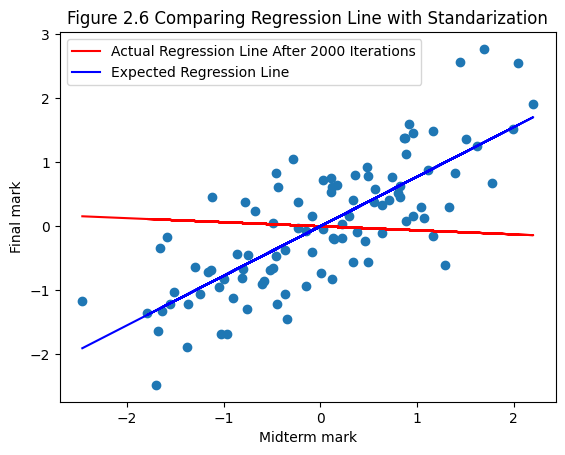

In [696]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red', label='Actual Regression Line After 2000 Iterations')
plt.plot(xStand, model.coef_ * xStand + model.intercept_, color='blue', label='Expected Regression Line')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 2.6 Comparing Regression Line with Standarization')
plt.legend()
plt.show()


The current attempt with standardization needs a greater number of iterations than the prior one, which is a significant difference. We can compare it again after setting the iterations to `10000` as an example.


In [697]:
num_iterations = 10000
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(xStand, yStand, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(xStand, yStand, m, b)
  errors.append(error)

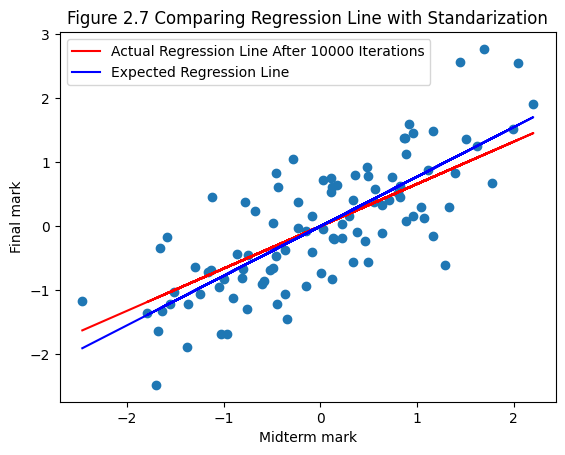

In [698]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red', label='Actual Regression Line After 10000 Iterations')
plt.plot(xStand, model.coef_ * xStand + model.intercept_, color='blue', label='Expected Regression Line')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 2.7 Comparing Regression Line with Standarization')
plt.legend()
plt.show()

As you can see, we get a similar graph as the one in Figure 1.7.

## Standarization (`α` = 0.1)

---

Re-implementing the prior functionality through the use of standardization. I'm going to re-initialize `m`, `b`, and `α`.


In [699]:
m, b, learnRate = -0.5, 0, 0.1

x = df['Midterm mark'].values
y = df['Final mark'].values

In [700]:
xMu = np.mean(x)
xSigma = np.std(x)
xStand = standardizationFunction(x, xMu, xSigma).reshape(-1, 1)

yMu = np.mean(y)
ySigma = np.std(y)
yStand = standardizationFunction(y, yMu, ySigma).reshape(-1, 1)

Like before, let's plot the initial regression line.

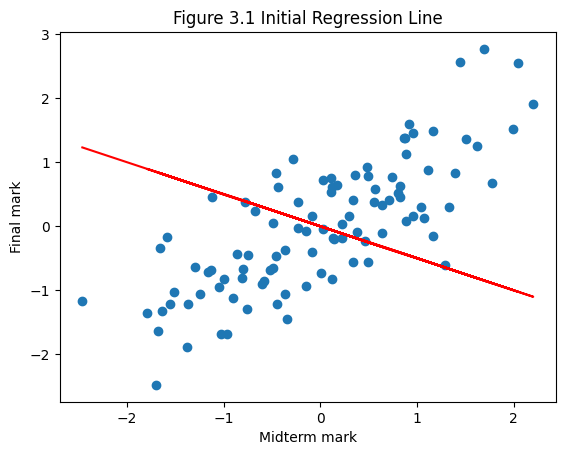

In [701]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 3.1 Initial Regression Line')
plt.show()


The large error number indicates that the initial regression line is, as predicted, significantly outside of the data set.

In [702]:
error = errorCostFunction(x, y, m, b)
print(error)

9873.218075


### Running 100 Iterations

---

Like before, we will run `100` iterations.

In [703]:
num_iterations = 100
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(xStand, yStand, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(xStand, yStand, m, b)
  errors.append(error)

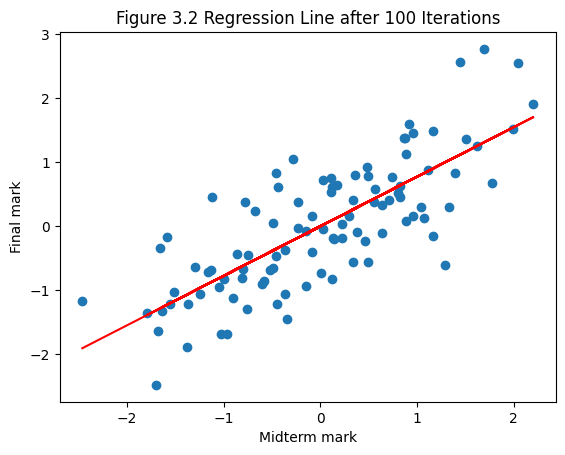

In [704]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 3.2 Regression Line after 100 Iterations')
plt.show()

In [705]:
print(error)

0.4017315614223312


In [706]:
print('slope:', m)
print('intercept:', b)

slope: 0.7734781433087615
intercept: 2.5102142586774806e-16


Then, below is the plot of the error at each iteration.

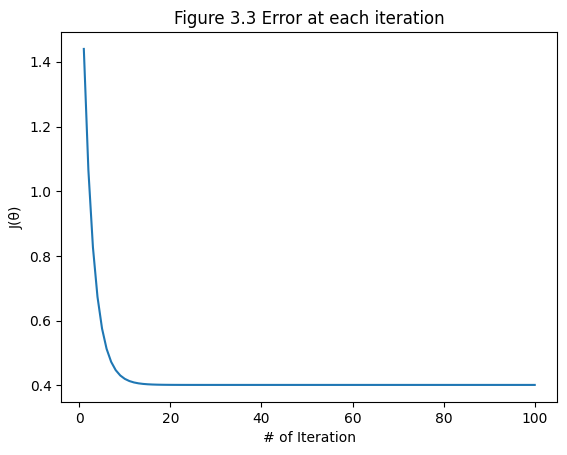

In [707]:
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('# of Iteration')
plt.ylabel('J(\u03B8)')
plt.title('Figure 3.3 Error at each iteration')
plt.show()

### Running 2000 Iterations

---

Then, again but now with `2000` iterations.

In [708]:
num_iterations = 2000
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(xStand, yStand, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(xStand, yStand, m, b)
  errors.append(error)

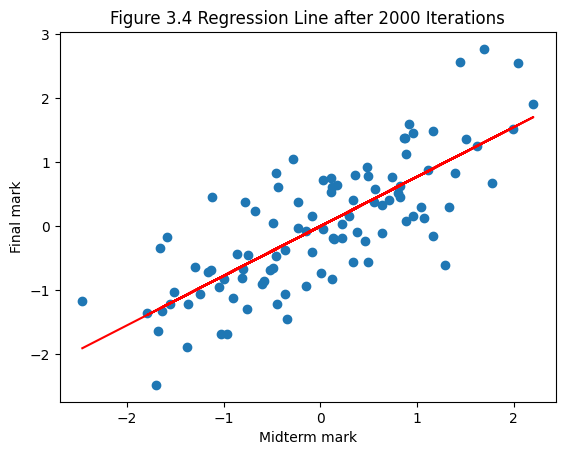

In [709]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 3.4 Regression Line after 2000 Iterations')
plt.show()

In [710]:
print(error)

0.40173156142233124


In [711]:
print('slope:', m)
print('intercept:', b)

slope: 0.7734781435681735
intercept: 2.727817971503821e-16


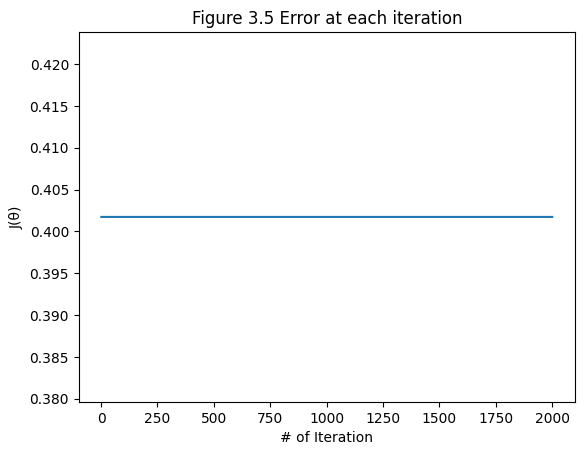

In [712]:
plt.plot(range(1, num_iterations + 1), errors)
plt.xlabel('# of Iteration')
plt.ylabel('J(\u03B8)')
plt.title('Figure 3.5 Error at each iteration')
plt.show()

### Verifying Results

---

The regression line that was generated through standarization is going to be verified using the standarized dataset.

In [713]:
model = LinearRegression().fit(xStand, yStand)

In [714]:
print('slope:', model.coef_)
print('intercept:', model.intercept_)

slope: [[0.77347814]]
intercept: [2.55154319e-16]


In a similar manner to our previous work, we may compare the regression line that was obtained with what was expected.

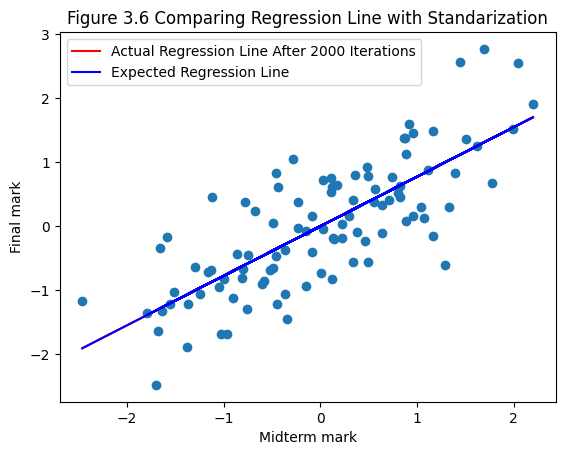

In [715]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red', label='Actual Regression Line After 2000 Iterations')
plt.plot(xStand, model.coef_ * xStand + model.intercept_, color='blue', label='Expected Regression Line')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 3.6 Comparing Regression Line with Standarization')
plt.legend()
plt.show()

The current attempt with standardization needs a greater number of iterations than the prior one, which is a significant difference. We can compare it again after setting the iterations to `10000` as an example.

In [716]:
num_iterations = 10000
errors = []

for iterations in range(num_iterations):
  dM, dB = gradientFunction(xStand, yStand, m, b)
  m, b = updateParameter(m, b, dM, dB, learnRate)
  error = errorCostFunction(xStand, yStand, m, b)
  errors.append(error)

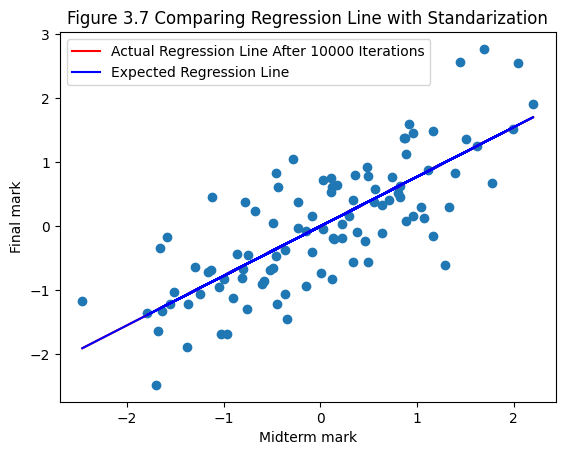

In [717]:
plt.scatter(xStand, yStand)
plt.plot(xStand, m * xStand + b, color='red', label='Actual Regression Line After 10000 Iterations')
plt.plot(xStand, model.coef_ * xStand + model.intercept_, color='blue', label='Expected Regression Line')
plt.xlabel('Midterm mark')
plt.ylabel('Final mark')
plt.title('Figure 3.7 Comparing Regression Line with Standarization')
plt.legend()
plt.show()

## Q1: Observation with Learning Rate 0.1
---

* With a higher learning rate of 0.1, the algorithm converges much faster compared to the previous learning rate of 0.0001. This can be seen in both the regression line plot and the error plot.

* However, as seen in the error plot, the error fluctuates significantly with a high learning rate. This is because the large steps in parameter updates can lead to overshooting the optimal values, causing the algorithm to oscillate around the minimum point rather than converging smoothly.

* Consequently, while a higher learning rate speeds up convergence, it can also make the optimization process less stable and prone to oscillations. Therefore, choosing an appropriate learning rate is crucial for balancing convergence speed and stability.

## Q2: Investigate the effect of standardization.
---

* Without standardization, the optimization process may be less efficient, as the scales of the features (midterm marks and final marks) are different. This can lead to difficulties in finding the optimal parameters for the regression model.

* As shown in the error plot, the error tends to be higher and fluctuates more when standardization is not applied. This indicates that the optimization process is less stable and may take longer to converge.

* Additionally, without standardization, the resulting regression line may not accurately capture the underlying patterns in the data, as the influence of each feature on the model parameters is not appropriately balanced.

* Moreover, standardization not only scales the features but also centers them around zero by subtracting the mean from each feature. This ensures that the mean of the standardized features is close to zero, making the optimization process more stable and efficient.

* Overall, standardization helps improve the efficiency and stability of the optimization process and leads to more accurate regression models by ensuring that features are on similar scales and centered around zero.